<a href="https://colab.research.google.com/github/Ragorrison/CASOS-DE-ESTUDIO/blob/main/notebooks/Cluster2P_Jerarbasico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos para construir un clasificador no supervisado



1.   Método del vecino más cercano, single
2.   Método del vecino más lejano
3.   Método de Ward
4.   Método del promedio

Todos se denominan métodos jerárqicos





In [ ]:
!pip install scipy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Librerías necesarias para la distancia entre individuos
from scipy import spatial
from scipy.spatial.distance import pdist,squareform



In [ ]:
#Métodos jerárquicos, dos bibliotecas. Ver las ventajas
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
# para que quede bonita las salidas
from sklearn.metrics import pairwise_distances


#Con lo sencillo

In [ ]:
#Tres listas de data, de tres características
x1 = [6, 5, 11, 7, 18, 13]
y1 = [10, 9, 12, 11, 12, 16]
z1=[3.7,2.4,5.8,4.0,6.0,6.1]

#Ahora se organizan en forma de tabla
data1 = list(zip(x1, y1,z1))
data1

[(6, 10, 3.7),
 (5, 9, 2.4),
 (11, 12, 5.8),
 (7, 11, 4.0),
 (18, 12, 6.0),
 (13, 16, 6.1)]

**Construir un dataframe con pandas**

La función contiene dos arguemntos los datos y los nombres de las variables en columns

In [ ]:
data1=pd.DataFrame(data1,columns=["x1","y1","z1"])
data1

,x1,y1,z1
0,6,10,3.7
1,5,9,2.4
2,11,12,5.8
3,7,11,4.0
4,18,12,6.0
5,13,16,6.1


Construir una matriz de distancias:



1.   Distancia de la ciudad
2.   Distancia Euclidiana



In [ ]:
v=pdist(data1,'cityblock')
v

array([ 3.3,  9.1,  2.3, 16.3, 15.4, 12.4,  5.6, 19.6, 18.7,  6.8,  7.2,
        6.3, 14. , 13.1,  9.1])

In [ ]:
v1=pdist(data1,'euclidean')
v1

array([ 1.92093727,  5.78013841,  1.44568323, 12.38103388,  9.52680429,
        7.52063827,  3.24961536, 13.81882774, 11.25566524,  4.49888875,
        7.00285656,  4.48218697, 11.22497216,  8.0876449 ,  6.40390506])

In [ ]:
mP = pdist(data1, 'cityblock')
mh = squareform(mP,force='tomatrix')
print(f"Data shape: {data1.shape}\nMatrix shape: {mh.shape}")

pd.DataFrame(mh[:6,:6])
#describa el código, presente solo las distancias para los primeros tres sujetos

Data shape: (6, 3)
Matrix shape: (6, 6)


,0,1,2,3,4,5
0,0.0,3.3,9.1,2.3,16.3,15.4
1,3.3,0.0,12.4,5.6,19.6,18.7
2,9.1,12.4,0.0,6.8,7.2,6.3
3,2.3,5.6,6.8,0.0,14.0,13.1
4,16.3,19.6,7.2,14.0,0.0,9.1
5,15.4,18.7,6.3,13.1,9.1,0.0


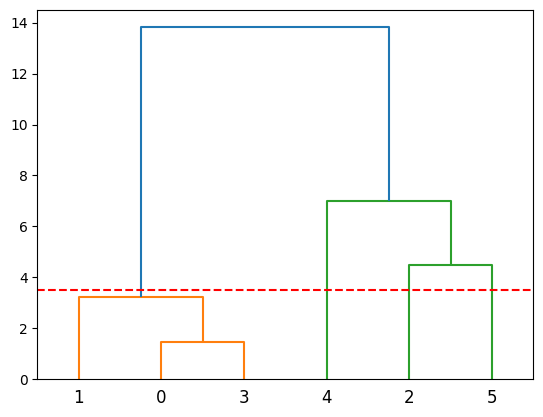

In [ ]:
#Una segmentación sencilla
linkage_data1 = linkage(data1, method='complete', metric='euclidean')
dendrogram(linkage_data1)
# Para graficar una linea horizontal con base a la primera distancia más grande entre clusters
plt.axhline(3.5, color='red', linestyle='--');
plt.show()

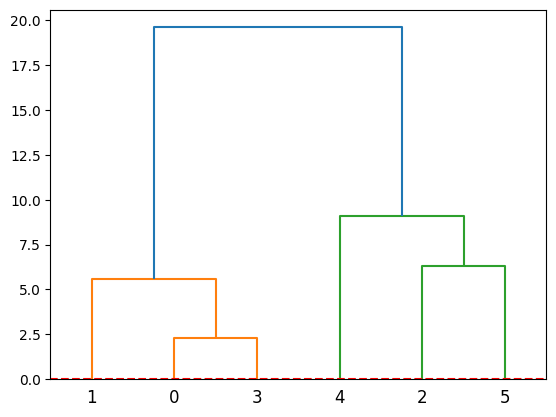

In [ ]:
#Una segmentación sencilla usando como métrica la distancia de la ciudad
linkage_data1 = linkage(data1, method='complete', metric='cityblock')
dendrogram(linkage_data1)
# Para graficar una linea horizontal con base a la primera distancia más grande entre clusters
plt.axhline(color='red', linestyle='--');
plt.show()

In [ ]:
dist_indiv = pd.DataFrame(squareform(pdist(data1, metric='euclidean')))
dist_indiv

,0,1,2,3,4,5
0,0.000000,1.920937,5.780138,1.445683,12.381034,9.526804
1,1.920937,0.000000,7.520638,3.249615,13.818828,11.255665
2,5.780138,7.520638,0.000000,4.498889,7.002857,4.482187
3,1.445683,3.249615,4.498889,0.000000,11.224972,8.087645
4,12.381034,13.818828,7.002857,11.224972,0.000000,6.403905
5,9.526804,11.255665,4.482187,8.087645,6.403905,0.000000


En las siguientes celdas se muestra cómo usar la función linkage usando como argumento la matriz de distancia.

Por otro lado, se muestra las diferentes etapas de conglomeración del método jerárquico usado

In [ ]:
v=pdist(data1,'cityblock')

In [ ]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(v, method='complete', metric='cityblock')
pd.DataFrame(row_clusters,
             columns=['cluster1',  'cluster2','distancia', 'no. de indivudos en clust.'],
             index=['etapa %d' %(i+1) for i in range(row_clusters.shape[0])])

,cluster1,cluster2,distancia,no. de indivudos en clust.
etapa 1,0.0,3.0,2.3,2.0
etapa 2,1.0,6.0,5.6,3.0
etapa 3,2.0,5.0,6.3,2.0
etapa 4,4.0,8.0,9.1,3.0
etapa 5,7.0,9.0,19.6,6.0


## Cuando los datos están en un archivo, ¿cómo subir el archivo?

In [ ]:
from google.colab import files
carga=files.upload()

Saving clusterpais.xlsx to clusterpais.xlsx


In [ ]:
import pandas as pd

data2=pd.read_excel(carga['clusterpais.xlsx'])
data2.head()

/tmp/ipython-input-3651148048.py:3: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  data2=pd.read_excel(carga['clusterpais.xlsx'])


,Paises,X_1,X_2,X_3,X_4,X_5,X_6,X_7
0,Australia,2,6,8.4,10.1,12,5.2,36
1,Francia,97,9,10.7,9.2,10,3.7,28
2,Alemania,247,6,12.4,9.1,15,4.6,33
3,Grecia,72,31,4.1,8.1,19,1.7,12
4,Islandia,2,13,11.0,6.6,11,5.8,25


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Librerías necesarias para la distancia entre individuos
from scipy import spatial
from scipy.spatial.distance import pdist,squareform

#Métodos jerárquicos, dos bibliotecas. Ver las ventajas
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# para que quede bonita las salidas
from sklearn.metrics import pairwise_distances


In [ ]:
#Eliminar una columna, se hace con la instrucción "drop"
data3=data2.drop(['Paises'],axis=1)
data3.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7
0,2,6,8.4,10.1,12,5.2,36
1,97,9,10.7,9.2,10,3.7,28
2,247,6,12.4,9.1,15,4.6,33
3,72,31,4.1,8.1,19,1.7,12
4,2,13,11.0,6.6,11,5.8,25


In [ ]:
mh = squareform(v2,force='tomatrix')

pd.DataFrame(mh[:6,:6])

,0,1,2,3,4,5
0,0.0,112.7,256.6,135.8,25.7,220.6
1,112.7,0.0,165.7,81.7,108.0,116.5
2,256.6,165.7,0.0,237.2,269.1,88.0
3,135.8,81.7,237.2,0.0,121.5,149.6
4,25.7,108.0,269.1,121.5,0.0,205.9
5,220.6,116.5,88.0,149.6,205.9,0.0


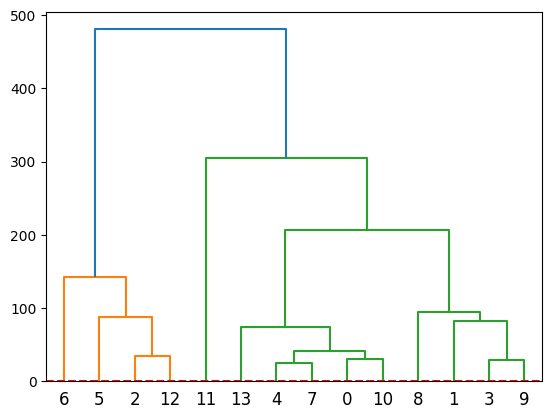

In [ ]:
#Una segmentación sencilla
linkage_data2 = linkage(data3, method='complete', metric='cityblock')
dendrogram(linkage_data2)
# Para graficar una linea horizontal con base a la primera distancia más grande entre clusters
plt.axhline(color='red', linestyle='--');
plt.show()

In [ ]:
v2=pdist(data3,'cityblock')

In [ ]:
from scipy.cluster.hierarchy import linkage

row_clusters2 = linkage(v2, method='complete', metric='cityblock')
pd.DataFrame(row_clusters2,
             columns=['cluster1',  'cluster2','distancia', 'no. de individuos en el segmen.'],
             index=['etapa %d' %(i+1) for i in range(row_clusters2.shape[0])])

,cluster1,cluster2,distancia,no. de individuos en el segmen.
etapa 1,4.0,7.0,25.0,2.0
etapa 2,3.0,9.0,29.7,2.0
etapa 3,0.0,10.0,30.4,2.0
etapa 4,2.0,12.0,35.1,2.0
etapa 5,14.0,16.0,41.9,4.0
etapa 6,13.0,18.0,74.0,5.0
etapa 7,1.0,15.0,81.7,3.0
etapa 8,5.0,17.0,88.0,3.0
etapa 9,8.0,20.0,94.9,4.0
etapa 10,6.0,21.0,141.8,4.0


###Uso de la función agglomerative

Comportamiento de los individuos en cada cluster, ¿cómo se hace?



*   Diagrama de dispersión
*  Cantidad de individuos en cada cluster
*  Comportamiento en cada grupo, estadísticas descriptivas (ayudan)
*  Uso de variables o atributos no usados en la segmentación





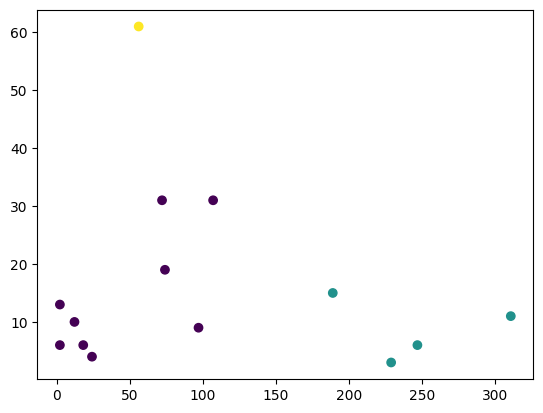

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='cityblock', linkage='complete')
labels = hierarchical_cluster.fit_predict(data3)
print(labels)
plt.scatter(data3.X_1,data3.X_2,c=labels)
plt.show()

In [ ]:
df_labels = pd.DataFrame({'Cluster': labels})
df_analysis2 = pd.concat([data2, df_labels], axis=1)
display(df_analysis2.head())

,Paises,X_1,X_2,X_3,X_4,X_5,X_6,X_7,Cluster
0,Australia,2,6,8.4,10.1,12,5.2,36,0
1,Francia,97,9,10.7,9.2,10,3.7,28,0
2,Alemania,247,6,12.4,9.1,15,4.6,33,1
3,Grecia,72,31,4.1,8.1,19,1.7,12,0
4,Islandia,2,13,11.0,6.6,11,5.8,25,0


In [ ]:
cluster_country_distribution = df_analysis2.groupby(['Cluster', 'Paises']).size().reset_index(name='Count')
display(cluster_country_distribution)

,Cluster,Paises,Count
0,0,Australia,1
1,0,España,1
2,0,Estados Unidos,1
3,0,Francia,1
4,0,Grecia,1
5,0,Islandia,1
6,0,NuevaZelanda,1
7,0,Portugal,1
8,0,Suecia,1
9,1,Alemania,1


In [ ]:
df_analysis2.groupby('Cluster')[['X_1','X_2']].describe()

X_1                                                             X_2  \
        count        mean        std    min    25%    50%    75%    max count   
Cluster                                                                         
0         9.0   45.333333  41.943414    2.0   12.0   24.0   74.0  107.0   9.0   
1         4.0  244.000000  50.819944  189.0  219.0  238.0  263.0  311.0   4.0   
2         1.0   56.000000        NaN   56.0   56.0   56.0   56.0   56.0   1.0   

                                                              
              mean        std   min    25%   50%   75%   max  
Cluster                                                       
0        14.333333  10.440307   4.0   6.00  10.0  19.0  31.0  
1         8.750000   5.315073   3.0   5.25   8.5  12.0  15.0  
2        61.000000        NaN  61.0  61.00  61.0  61.0  61.0

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.style.use('dark_background')

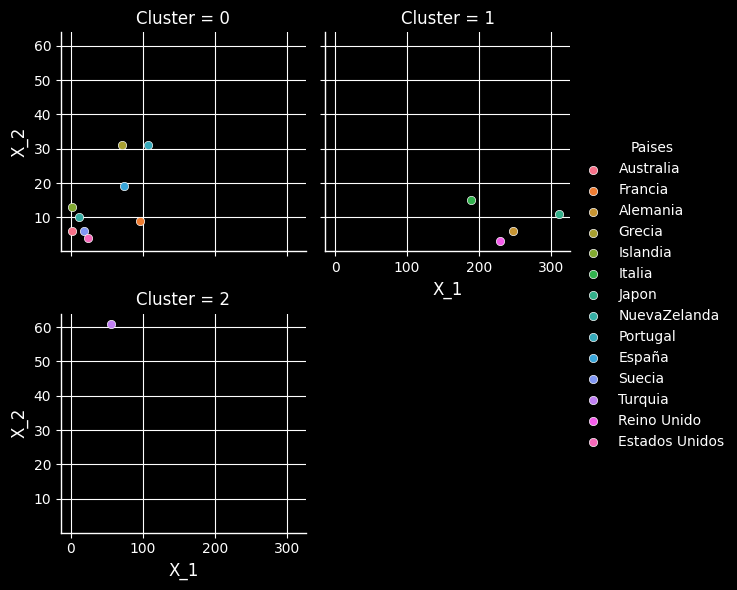

In [ ]:
#plt.style.use("fivethirtyeight")
#plt.style.use('dark_background')
#plt.style.use('ggplot')
grid = sns.FacetGrid(df_analysis2, col = "Cluster", hue = "Paises", col_wrap=2)
grid.map(sns.scatterplot, 'X_1','X_2')

grid.add_legend()

plt.show()

In [ ]:
row_clusters.shape[0]

5

## Método de Ward y estandarización de variables

#Normalización de los datos
$$z=\frac{x-𝜇}{σ}$$
Otro
$$z=\frac{x-x_{min}}{rec}$$

Escriba un comentario sobre la importancia de la normalización de variables


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [ ]:
ms = MinMaxScaler()
X = ms.fit_transform(data1)

In [ ]:
X_estand=StandardScaler().fit_transform(data1)

In [ ]:
#Una segmentación sencilla
linkage_dataM = linkage(X, method='complete', metric='euclidean')
dendrogram(linkage_dataM)
# Para graficar una linea horizontal con base a la primera distancia más grande entre clusters
plt.axhline(245000, color='black', linestyle='--');
plt.show()

**Método de Ward**

Se va construir una partición de los "sujetos" de tal forma que los grupos que la conforman tengan variabilidad pequeña.
Suponga que se tiene la siguiente partición $G_1$, $G_2$,.$G_p$. Se tienen las siguientes propiedades de los sujetos $X_1$ y $X_2$. Se calcula en cada grupo la expresión $$∑{(X_{i1}-\bar{X_1})}^2+ {(X_{i2}-\bar{X_2})}^2$$
La suma total de cada una de estas expresiones se llama SCW (Suma de cuadrados de Ward), se trata ahora de elegir una partición que haga pequeño este criterio.



In [ ]:
linkage_data = linkage(data1, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(8.5, color='blue', linestyle='--');
plt.show()

In [ ]:
data2.hist('X_1')

In [ ]:
data2.X_1.plot.hist(bins = 3);

##Descargar archivos en diferentes fromatos

In [ ]:
from google.colab import files
data2.to_csv('resultados1.csv', encoding = 'utf-8-sig')
files.download('resultados1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data2.to_excel('lamos2.xlsx',index=False)

In [ ]:
files.download('lamos2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>